# Financial Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [15]:
kospi200 = pd.read_csv("./data/data.csv", encoding="cp949")
kospi200 = kospi200[kospi200.columns[:2]]
kospi200["종목코드"] = kospi200["종목코드"].map('{:06d}'.format)
kospi200.head()

,종목코드,종목명
0,006840,AK홀딩스
1,027410,BGF
2,282330,BGF리테일
3,138930,BNK금융지주
4,001040,CJ


In [20]:
kospi200["종목코드"][199]

'298040'

In [23]:
close.columns[1:][0]

'AK홀딩스'

In [117]:
c_li = {}
li_c = {}
for i in range(len(kospi200)):
    c_li[close.columns[1:][i]] = kospi200["종목코드"][i]
    li_c[kospi200["종목코드"][i]] = close.columns[1:][i]

In [116]:
v_li = {}
li_v = {}
for i in range(len(kospi200)):
    v_li[close.columns[1:][i]] = "XKRX:" + kospi200["종목코드"][i]
    li_v["XKRX:" + kospi200["종목코드"][i]] = close.columns[1:][i]

In [34]:
close = pd.read_csv("./data/infomax_data/new/single/close.csv", encoding = "cp949", low_memory=False)

In [35]:
close = close.loc[:1371]
close.head()

,일자,AK홀딩스,BGF,BGF리테일,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,...,현대중공업,현대중공업지주,현대차,현대해상,현대홈쇼핑,호텔신라,효성,효성중공업,후성,휴켐스
0,2013-01-02,22250,NaN,NaN,13450,124500,32250,103500,362000,44450,...,248500,NaN,216000,32000,122500,43500,74300,NaN,4965,25600
1,2013-01-03,23000,NaN,NaN,13750,123500,32100,102000,369000,43800,...,248500,NaN,206000,31750,120500,41800,74800,NaN,4955,25500
2,2013-01-04,23700,NaN,NaN,13900,128000,32300,107500,375000,43600,...,243500,NaN,206000,32650,123500,41550,74700,NaN,4980,25050
3,2013-01-07,23800,NaN,NaN,14000,127000,32750,107500,368000,44500,...,241500,NaN,208500,33150,125500,44000,73400,NaN,5080,25650
4,2013-01-08,23700,NaN,NaN,14100,122500,32650,113000,358000,42800,...,237000,NaN,210000,32100,125000,43750,71100,NaN,5130,26250


In [160]:
ss = pd.read_csv("./data/stock_split_2.csv", encoding="cp949")

In [161]:
ss = ss[ss.columns[:3]]

In [162]:
ss["Split date"] = ss["Split date"].fillna(method="ffill")

In [163]:
ss["Company"] = [i[2] for i in list(map(lambda x : x.split("?"), ss["Company"]))]

In [164]:
ss["Company"] = [i[1:7]for i in ss["Company"]]

In [165]:
ss.head()

,Split date,Company,Split ratio
0,2018-08-02,065440,1.055:1
1,2018-08-01,053270,1.125:1
2,2018-08-01,045060,1.086:1
3,2018-07-26,024910,1:2
4,2018-07-25,080530,2:1


In [167]:
ss.columns = ["split_data", "code", "split_ratio"]
ss200 = ss.loc[[i in list(li_c.keys()) for i in ss["code"]]]

In [173]:
ss200["company"] = ss200["code"].replace(li_c)

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
ss200["front"] = [i[0] for i in list(map(lambda x : x.split(":"), ss200["split_ratio"]))]

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [182]:
ss200["front"] = ss200["front"].astype(np.float)

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [240]:
ss200[ss200.company == "BGF"]

,split_data,code,split_ratio,company,front
203,2017-12-08,027410,2:1,BGF,2.0
478,2016-11-23,027410,1.5:1,BGF,1.5


In [242]:
np.where(close["일자"] == '2016-11-23')

(array([959], dtype=int64),)

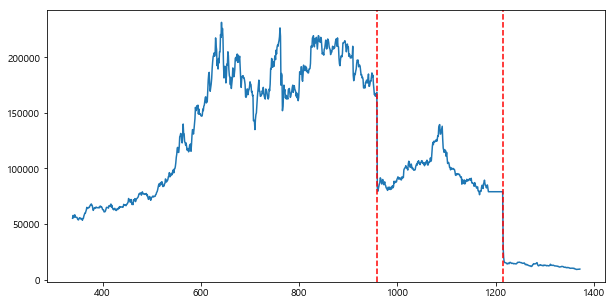

In [245]:
close["BGF"].plot(figsize=(10,5))
plt.axvline(x=1215, color='r',linestyle='--')
plt.axvline(x=959, color='r',linestyle='--')

In [111]:
lookup_li = ["BGF", "SK디스커버리", "대우조선해양", "동서", "동양", "롯데지주", "만도", "보령제약",\
             "삼성엔지니어링", "삼성전자", "삼양홀딩스", "쌍용양회", "아모레G", "아모레퍼시픽", \
             "오리온홀딩스", "유니드", "코스맥스", "쿠쿠홀딩스", "팬오션", "한라홀딩스", "한온시스템", "효성"]
ac_li = ["BGF", "SK디스커버리", "동서", "동양", "롯데지주", "만도", "보령제약", "삼성전자", \
             "쌍용양회", "아모레G", "아모레퍼시픽", "오리온홀딩스", "유니드","한라홀딩스", "한온시스템"]
out_li = ["대우조선해양","삼양홀딩스"]
nor_li = ["쿠쿠홀딩스","팬오션","효성"]

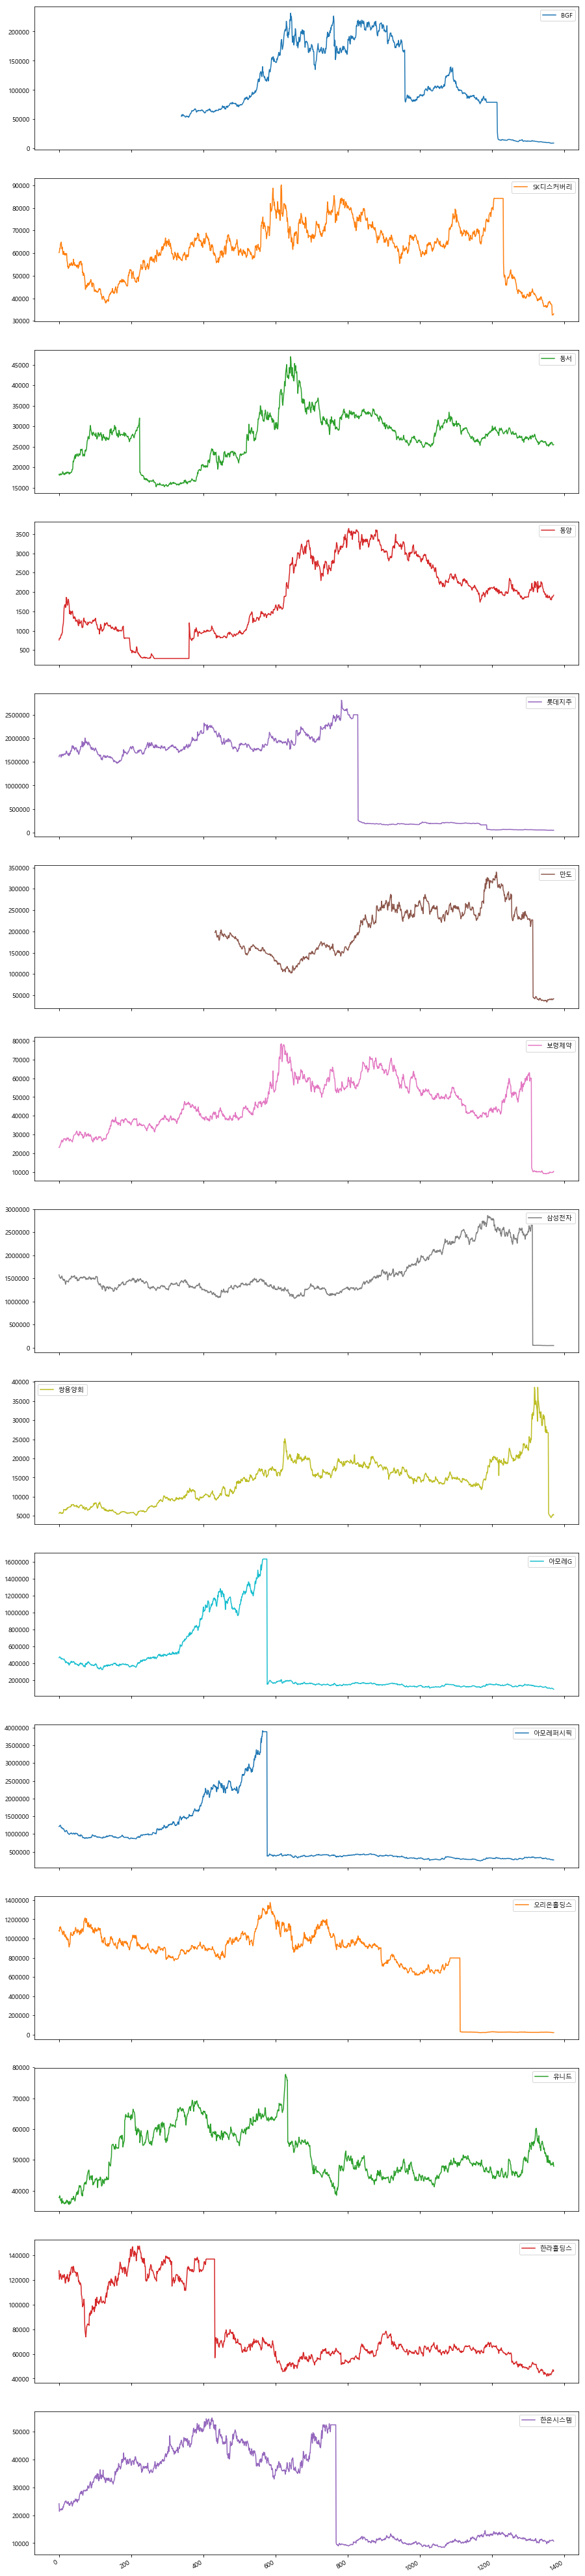

In [188]:
test = close[ac_li]
test.plot(subplots=True,figsize=(15,80))
plt.show()

In [40]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from datetime import datetime

start = datetime(2013,7,1)
end = datetime(2018,7,31)